# Export RNA data to anndata

In [1]:
import scanpy as sc
import pandas as pd

In [2]:
import os

In [3]:
from pathlib import Path
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "L2_3_IT")

In [4]:
rna_counts = sc.read_mtx("L2_3_IT_rna_matrix.mtx")

In [5]:
rna_counts = rna_counts.T.copy()

In [6]:
cell_meta = pd.read_csv("L2_3_IT_meta_data.tsv", header=0, index_col=0, sep="\t")
gene_names = pd.read_csv("L2_3_IT_gene_names.tsv", header=None, index_col=0, sep="\t")
gene_names.index.name = None

In [7]:
rna_counts.obs = cell_meta
rna_counts.var = gene_names

In [8]:
sampled_barcodes = pd.read_csv("L2_3_IT_cell_barcodes_25p_sampled.tsv", sep="\t", header=None)
sampled_barcodes.columns = ["barcodes"]
rna_counts = rna_counts[sampled_barcodes["barcodes"]].copy()

In [9]:
rna_counts

AnnData object with n_obs × n_vars = 74674 × 32876
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Batch', 'percent.mt', 'Major_Class', 'PatientID', 'Region', 'Subclass_F', 'Cell_type'

In [10]:
rna_counts.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,Batch,percent.mt,Major_Class,PatientID,Region,Subclass_F,Cell_type
R_20211021A_M1CR45_GACTAGTAAGATGTACAAACATCG,M1CR45,5728,2452,R_20211021A,0.000000,Excitatory,UW 7118,M1C,L2/3 IT,L2/3 IT_3
R_20210624B_FIR45_GCTAACGAAGATGTACACAGCAGA,FIR45,33807,7161,R_20210624B,0.269175,Excitatory,H19.30.004,FI,L2/3 IT,L2/3 IT_6
R_20220217B_ANGR94_AGAGTCAAGCCAAGACACCTCCAA,ANGR94,15553,4843,R_20220217B,0.000000,Excitatory,H19.30.002,AnG,L2/3 IT,L2/3 IT_6
R_20211021A_M1CR40_AACCGAGAAGCAGGAAAACGCTTA,M1CR40,38752,7489,R_20211021A,0.010322,Excitatory,UW 7118,M1C,L2/3 IT,L2/3 IT_6
R_20210617B_ANGR47_AGTACAAGAAGACGGACAATGGAA,ANGR47,4311,2169,R_20210617B,0.115982,Excitatory,H19.30.004,AnG,L2/3 IT,L2/3 IT_6


In [11]:
rna_counts.raw = rna_counts.copy()
sc.pp.normalize_total(rna_counts, target_sum=1e4)
sc.pp.log1p(rna_counts)
sc.pp.highly_variable_genes(rna_counts, min_mean=0.0125, max_mean=3, min_disp=0.5)
rna_counts = rna_counts[:, rna_counts.var.highly_variable]
sc.pp.scale(rna_counts, max_value=10)

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


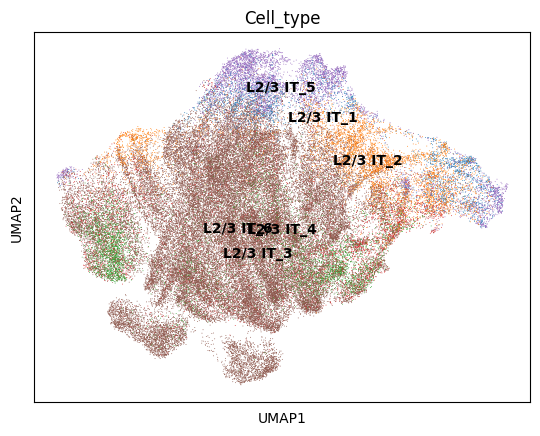

In [12]:
sc.tl.pca(rna_counts)
sc.pp.neighbors(rna_counts)
sc.tl.umap(rna_counts)
sc.pl.umap(rna_counts, color = "Cell_type", legend_loc="on data")

In [13]:
rna_counts.write("L2_3_IT_rna_matrix.h5ad")

In [14]:
rna_counts

AnnData object with n_obs × n_vars = 74674 × 4142
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Batch', 'percent.mt', 'Major_Class', 'PatientID', 'Region', 'Subclass_F', 'Cell_type'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'Cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'